In [1]:
import json

In [2]:
with open("../artifacts/kaggle.json") as file:
    data = json.load(file)

data


{'username': 'ishanjayawardana98', 'key': '9ac5e26d31ac77af360d5bd5183f3e27'}

In [3]:
pip install kaggle

In [4]:
import os
os.environ["KAGGLE_USERNAME"]=data["username"]
os.environ["KAGGLE_KEY"]=data["key"]


In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [6]:
api.dataset_download_files("dineshpiyasamara/sentiment-analysis-dataset",path ="../artifacts/")

In [7]:
import zipfile
with zipfile.ZipFile("../artifacts/sentiment-analysis-dataset.zip","r") as zip:
    zip.extractall("../artifacts/")
    

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../artifacts/sentiment_analysis.csv")
df

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


Data Preprocessing

In [9]:
import re
import string

In [10]:
df.shape

(7920, 3)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

Text preprocessing

Uppercase --> Lowercase

In [13]:
df["tweet"] = df["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [14]:
df["tweet"]

0       #fingerprint #pregnancy test https://goo.gl/h1...
1       finally a transparant silicon case ^^ thanks t...
2       we love this! would you go? #talk #makememorie...
3       i'm wired i know i'm george i was made that wa...
4       what amazing service! apple won't even talk to...
                              ...                        
7915    live out loud #lol #liveoutloud #selfie #smile...
7916    we would like to wish you an amazing day! make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my #smart #pocket #wifi stay conne...
7919    apple barcelona!!! #apple #store #bcn #barcelo...
Name: tweet, Length: 7920, dtype: object

Link remove

In [15]:
df["tweet"] = df["tweet"].apply(lambda x: " ".join(re.sub(r"^https?:\/\/.*[\r\n]*",'',x, flags =re.MULTILINE) for x in x.split()))

In [16]:
df["tweet"]

0       #fingerprint #pregnancy test  #android #apps #...
1       finally a transparant silicon case ^^ thanks t...
2       we love this! would you go? #talk #makememorie...
3       i'm wired i know i'm george i was made that wa...
4       what amazing service! apple won't even talk to...
                              ...                        
7915    live out loud #lol #liveoutloud #selfie #smile...
7916    we would like to wish you an amazing day! make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my #smart #pocket #wifi stay conne...
7919    apple barcelona!!! #apple #store #bcn #barcelo...
Name: tweet, Length: 7920, dtype: object

Punctuation remove

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punctuation(text):
    for p in string.punctuation:
        text = text.replace(p,"")
    return text

df["tweet"] = df["tweet"].apply(remove_punctuation)

In [19]:
df["tweet"]

0       fingerprint pregnancy test  android apps beaut...
1       finally a transparant silicon case  thanks to ...
2       we love this would you go talk makememories un...
3       im wired i know im george i was made that way ...
4       what amazing service apple wont even talk to m...
                              ...                        
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, Length: 7920, dtype: object

In [20]:
df["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Number remove

In [21]:
df["tweet"] = df["tweet"].str.replace("\d+","",regex = True)

In [22]:
df["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Stopwords remove

In [23]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [24]:
import nltk

In [25]:
nltk.download("stopwords",download_dir ="../static/stopword/")

[nltk_data] Downloading package stopwords to ../static/stopword/...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
with open("../static/stopword/corpora/stopwords/english","r") as file:
    stopword = file.read().splitlines()
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
df["tweet"] = df["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in stopword) )

In [28]:
df["tweet"]


0       fingerprint pregnancy test android apps beauti...
1       finally transparant silicon case thanks uncle ...
2       love would go talk makememories unplug relax i...
3       im wired know im george made way iphone cute d...
4       amazing service apple wont even talk question ...
                              ...                        
7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, Length: 7920, dtype: object

In [29]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()


In [30]:
df["tweet"] = df["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [31]:
df["tweet"]

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [32]:
df = df.drop(["id"],axis =1)
df

,label,tweet
0,0,fingerprint pregnanc test android app beauti c...
1,0,final transpar silicon case thank uncl yay son...
2,0,love would go talk makememori unplug relax iph...
3,0,im wire know im georg made way iphon cute dave...
4,1,amaz servic appl wont even talk question unles...
...,...,...
7915,0,live loud lol liveoutloud selfi smile soni mus...
7916,0,would like wish amaz day make everi minut coun...
7917,0,help love year old neighbor ipad morn made rea...
7918,0,final got smart pocket wifi stay connect anyti...


In [33]:
from collections import Counter
vb = Counter()

In [34]:
for sentence in df["tweet"]:
    vb.update(sentence.split())

In [35]:
vb

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [36]:
len(vb)

15949

In [37]:
df.shape

(7920, 2)

In [38]:
tokens = [key for key in vb if vb[key] > 10]

In [39]:
len(tokens)

1145

In [40]:
def save_vb(lines,file_name):
    data = "\n".join(lines)
    file = open(file_name,"w",encoding ="utf-8")
    file.write(data)
    file.close()
    
save_vb(tokens,"../static/vb_text/vb.txt")
    

In [41]:
x = df["tweet"]
y = df["label"]

In [42]:
x

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [43]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

vectorization

In [45]:
def vectorizer(data_set,vocabulary):
    vt_list = []
    for sentence in data_set:
        sentence_list = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1
        vt_list.append(sentence_list)
    vt_list_new = np.asarray(vt_list, dtype =np.float32)
    return vt_list_new

In [46]:
v_x_train = vectorizer(x_train,tokens)

In [47]:
v_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
#for i in v_x_train[0]:
#    print(i)

In [49]:
v_x_test = vectorizer(x_test,tokens)

In [50]:
v_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
#for i in v_x_test[0]:
#    print(i)

In [52]:
y_train.value_counts()

label
0    4729
1    1607
Name: count, dtype: int64

In [53]:
np.array([y_train.value_counts()[0],y_train.value_counts()[1]])

array([4729, 1607], dtype=int64)

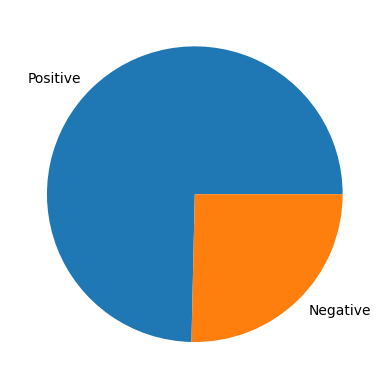

In [54]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels =["Positive" ,"Negative"])
plt.show()

In [55]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Handle Imbalanced Dataset

In [56]:
from imblearn.over_sampling import SMOTE
smote =SMOTE()
v_x_train_smote,y_train_smote = smote.fit_resample(v_x_train,y_train)

In [57]:
y_train_smote.value_counts()

label
0    4729
1    4729
Name: count, dtype: int64

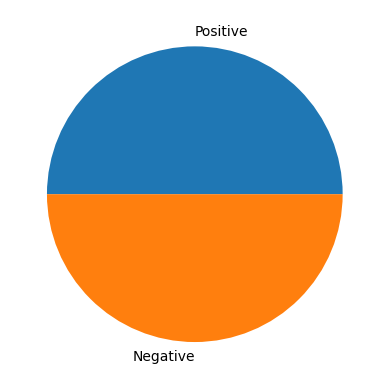

In [58]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels =["Positive" ,"Negative"])
plt.show()

Model Training

In [59]:
x_train_ = v_x_train_smote
y_train_ = y_train_smote
x_test_ = v_x_test
y_test_=y_test


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [61]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [62]:
def train_score(y_act,y_pred):
    accuracy = round(accuracy_score(y_act,y_pred),3)
    precision = round(precision_score(y_act,y_pred),3)
    recall = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f"Traning Score : \n\t Accuracy ={accuracy} \n\t precision = {precision} \n\t recall = {recall} \n\t f1 ={f1}")


In [63]:
def test_score(y_act,y_pred):
    accuracy = round(accuracy_score(y_act,y_pred),3)
    precision = round(precision_score(y_act,y_pred),3)
    recall = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f"Testing Score : \n\t Accuracy ={accuracy} \n\t precision = {precision} \n\t recall = {recall} \n\t f1 ={f1}")

In [64]:
lr = LogisticRegression()
mnb = MultinomialNB()
dt =DecisionTreeClassifier()
rf = RandomForestClassifier()
svc =SVC()


In [65]:
def ml_model(MODEL):
    print(f"\n\t......{MODEL}......\n")
    model = MODEL.fit(x_train_,y_train_)

    y_train_pred = model.predict(x_train_)
    y_test_pred = model.predict(x_test_)
    
    train_score(y_train_,y_train_pred)
    test_score(y_test_,y_test_pred)
    

In [66]:
ml_model(lr)
ml_model(mnb)
ml_model(dt)
ml_model(rf)
ml_model(svc)



	......LogisticRegression()......

Traning Score : 
	 Accuracy =0.942 
	 precision = 0.92 
	 recall = 0.968 
	 f1 =0.943
Testing Score : 
	 Accuracy =0.873 
	 precision = 0.732 
	 recall = 0.821 
	 f1 =0.774

	......MultinomialNB()......

Traning Score : 
	 Accuracy =0.906 
	 precision = 0.87 
	 recall = 0.953 
	 f1 =0.91
Testing Score : 
	 Accuracy =0.869 
	 precision = 0.687 
	 recall = 0.928 
	 f1 =0.79

	......DecisionTreeClassifier()......

Traning Score : 
	 Accuracy =1.0 
	 precision = 1.0 
	 recall = 0.999 
	 f1 =1.0
Testing Score : 
	 Accuracy =0.823 
	 precision = 0.672 
	 recall = 0.644 
	 f1 =0.658

	......RandomForestClassifier()......

Traning Score : 
	 Accuracy =1.0 
	 precision = 1.0 
	 recall = 0.999 
	 f1 =1.0
Testing Score : 
	 Accuracy =0.874 
	 precision = 0.772 
	 recall = 0.742 
	 f1 =0.757

	......SVC()......

Traning Score : 
	 Accuracy =0.98 
	 precision = 0.964 
	 recall = 0.996 
	 f1 =0.98
Testing Score : 
	 Accuracy =0.88 
	 precision = 0.756 
	 recall = 

In [67]:
import pickle
with open("../static/model/model.pickle","wb") as file:
    pickle.dump(lr,file)
    
    